In [ ]:
!pip install wget

In [ ]:
!pip install yfinance

In [ ]:
import pandas as pd
import wget
from zipfile import ZipFile
import yfinance as yf

In [ ]:
url = 'http://dados.cvm.gov.br/dados/CIA_ABERTA/DOC/DFP/DADOS/'
pathout = '/content/balanco/'
pathoutcsv = '/content/csv/'
anoInicial = 2010

In [ ]:
arquivos = []
for ano in range(anoInicial, 2021):
    arquivos.append(f'dfp_cia_aberta_{ano}.zip')

In [ ]:
arquivos

In [ ]:
#baixar os arquivos de balanço
for arq in arquivos:
    wget.download(url+arq, out=pathout)

In [ ]:
#extrair os arquivos zipados
for arq in arquivos:
    ZipFile(pathout + arq, 'r').extractall(pathoutcsv)

In [ ]:
#ler DRE (demostração de resultados do exercício)
data = pd.DataFrame()
for ano in range(anoInicial,2021):
    data = pd.concat([data, pd.read_csv(pathoutcsv+f'dfp_cia_aberta_DRE_con_{ano}.csv', sep=';', decimal=',', encoding='ISO-8859-1')])

In [ ]:
data = data[data['DS_CONTA'].str.contains('Lucro') & data['DS_CONTA'].str.contains('Prejuízo') & data['DS_CONTA'].str.contains('Consolidado')]
data = data[data['ORDEM_EXERC'] == 'ÚLTIMO']

In [ ]:
data = data.drop(columns=['CNPJ_CIA', 'DT_REFER', 'VERSAO', 'CD_CVM', 'GRUPO_DFP', 'MOEDA', 'ESCALA_MOEDA',
                          'CD_CONTA', 'ST_CONTA_FIXA'])

In [ ]:
data[data['DENOM_CIA'].str.contains('ENERGISA')]

In [ ]:
stock = data[data['DENOM_CIA'] == 'ENERGISA S.A.']

In [ ]:
ll = []
for i in stock['VL_CONTA']:
    if(float(i) != 0):
        ll.append(float(i))

In [ ]:
lucrodf = pd.DataFrame(ll,columns=['lucro'])

In [ ]:
lucrodf

,lucro
0,194648.0
1,212054.0
2,291065.0
3,202747.0
4,304720.0
5,351401.0
6,195786.0
7,572582.0
8,1179672.0
9,527158.0


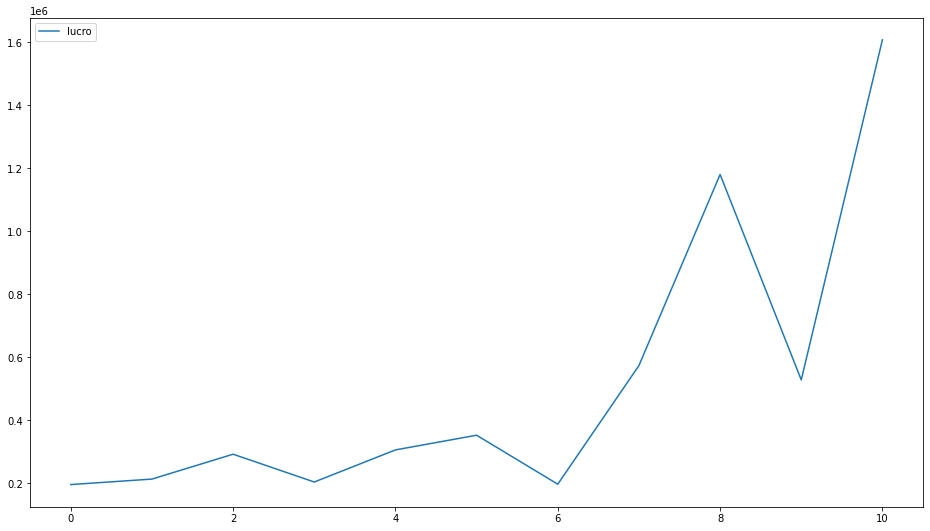

In [ ]:
lucrodf.plot(figsize=(16,9))